# TP 1 : Méthodes de Signal Avancées Annulation d’Écho Acoustique

In [149]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np

## I. Implémentation de l'algorithme LMS

### I.1 Générations de signaux tests

In [150]:

ROOT = Path.cwd().parents[0]
sys.path.append(str(ROOT / "src"))


import signals_utils

reload(signals_utils)
from signals_utils import generate_test_signals


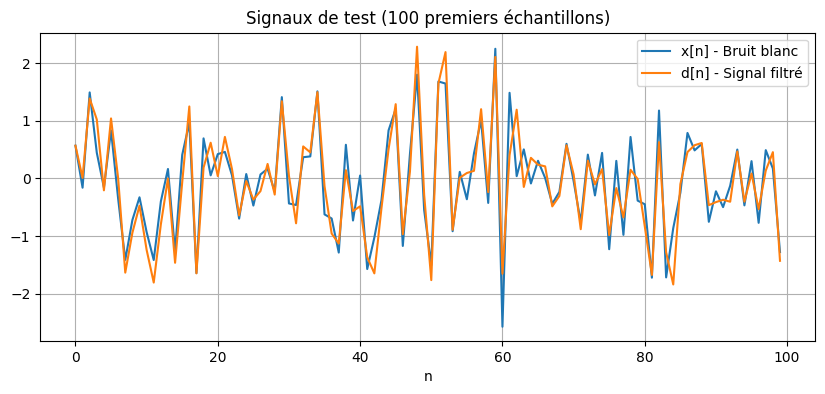

Réponse impulsionnelle utilisée : [ 1.   0.3 -0.1  0.2]


In [151]:
# Génération des signaux
x, d, h = generate_test_signals(N=500, variance = 1)

# Visualisation
plt.figure(figsize=(10, 4))
plt.plot(x[:100], label="x[n] - Bruit blanc")
plt.plot(d[:100], label="d[n] - Signal filtré")
plt.title("Signaux de test (100 premiers échantillons)")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()

print("Réponse impulsionnelle utilisée :", h)

### I.2 Mise en oeuvre de l'algorithme LMS

In [152]:
ROOT = Path.cwd().parents[0]
sys.path.append(str(ROOT / "src"))

import algoms

reload(algoms)
from algoms import algoms

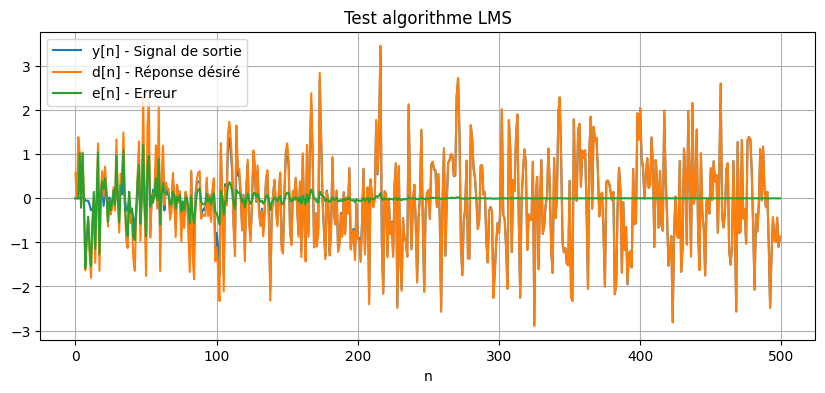

Réponse impulsionnelle utilisée : [ 1.   0.3 -0.1  0.2]


In [153]:
P = len (h)
mu = 0.02
w, y, erreur = algoms(x, d, P, mu)


# Visualisation
plt.figure(figsize=(10, 4))
plt.plot(y, label="y[n] - Signal de sortie")
plt.plot(d, label="d[n] - Réponse désiré")
plt.plot(erreur, label = "e[n] - Erreur")
plt.title("Test algorithme LMS")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()

print("Réponse impulsionnelle utilisée :", h)

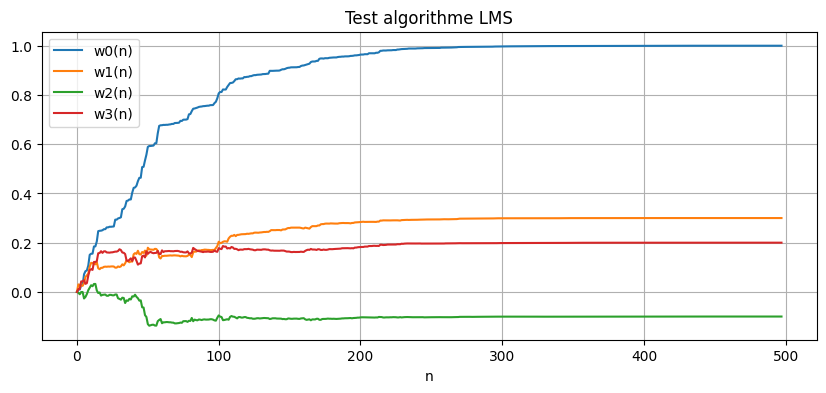

Réponse impulsionnelle utilisée : [ 1.   0.3 -0.1  0.2]
W final obtenue : [ 0.99997605  0.29999353 -0.10000441  0.19998958]


In [154]:
W_tot = np.array(w, dtype=float)
N=497
plt.figure(figsize=(10, 4))
for p in range(P):
    # Visualisation

    plt.plot(W_tot[:, p], label=f"w{p}(n)")

plt.title("Test algorithme LMS")
plt.xlabel("n")
plt.legend()
plt.grid(True)
plt.show()
print("Réponse impulsionnelle utilisée :", h)
print("W final obtenue :", W_tot[N, :])